In [1]:
 import pandas as pd
 import numpy as np

In [2]:
 df = pd.read_csv('data.csv', encoding='cp1252')

<ipython-input-2-cd4933a65337>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', encoding='cp1252')


In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415385 entries, 0 to 415384
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     279031 non-null  object 
 1   sampling_date                415385 non-null  object 
 2   state                        415385 non-null  object 
 3   location                     415385 non-null  object 
 4   agency                       273627 non-null  object 
 5   type                         409994 non-null  object 
 6   so2                          380969 non-null  float64
 7   no2                          399237 non-null  float64
 8   rspm                         375179 non-null  float64
 9   spm                          187363 non-null  float64
 10  location_monitoring_station  387896 non-null  object 
 11  pm2_5                        8674 non-null    float64
 12  date                         415380 non-null  object 
dtyp

In [6]:
 df=df.drop_duplicates()
 df.isna().sum()

,0
stn_code,136354
sampling_date,0
state,0
location,0
agency,141743
type,5355
so2,34402
no2,16137
rspm,40019
spm,227543


In [7]:
df=df.drop(['stn_code', 'agency','sampling_date','location_monitoring_station','pm2_5'], axis = 1)
df.head()


,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,1990-03-01


In [8]:
 col_var = ['state', 'location', 'type','date']
 col_num = ['so2','no2','rspm','spm']
 for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())
 df.isna().sum()

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
date,0


In [9]:
subSet1 = df[['state', 'type']]
subSet2 = df[['state','location']]
subSet1.head()
subSet2.head()

,state,type
0,Andhra Pradesh,"Residential, Rural and other Areas"
1,Andhra Pradesh,Industrial Area
2,Andhra Pradesh,"Residential, Rural and other Areas"
3,Andhra Pradesh,"Residential, Rural and other Areas"
4,Andhra Pradesh,Industrial Area


In [10]:
 concatenated_df = pd.concat([subSet1, subSet2], axis=1)
 concatenated_df

,state,type,state,location
0,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
3,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
...,...,...,...,...
415380,West Bengal,"Residential, Rural and other Areas",West Bengal,Kolkata
415381,West Bengal,"Residential, Rural and other Areas",West Bengal,Kolkata
415382,West Bengal,"Residential, Rural and other Areas",West Bengal,Kolkata
415383,West Bengal,"Residential, Rural and other Areas",West Bengal,Kolkata


In [13]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 +
threshold)
    return column[~outlier_mask]
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date'], dtype='object')

In [14]:
 col_name = ['so2', 'no2', 'rspm', 'spm']
 for col in col_name:
    df[col] = remove_outliers(df[col])


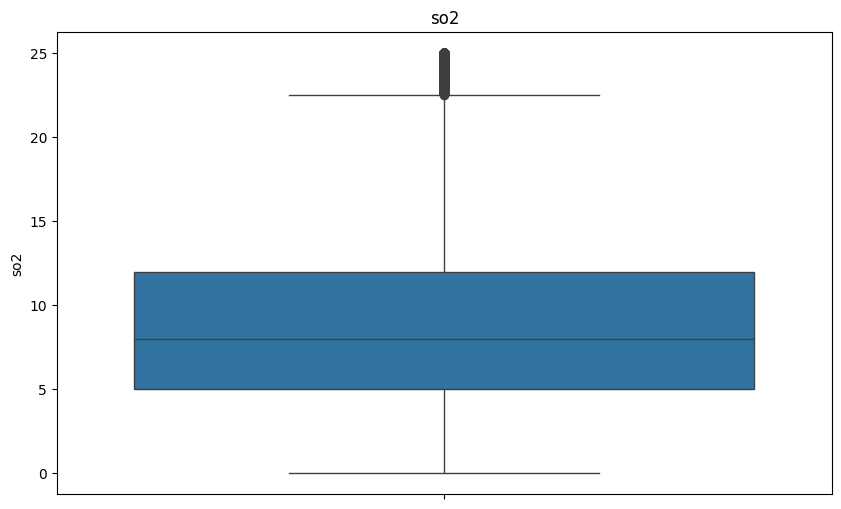

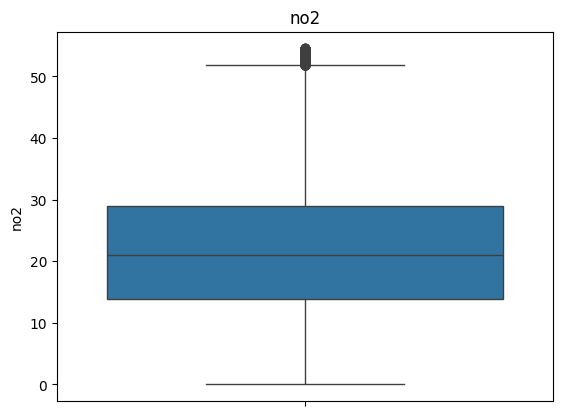

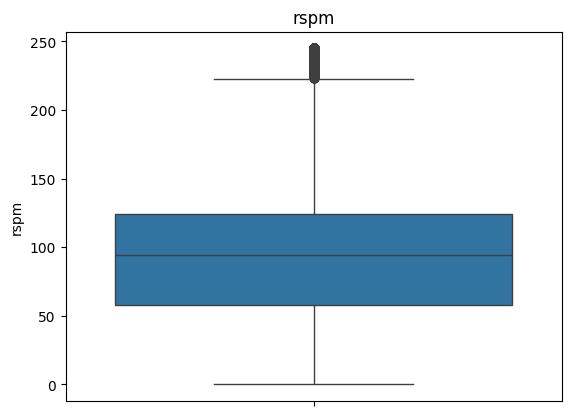

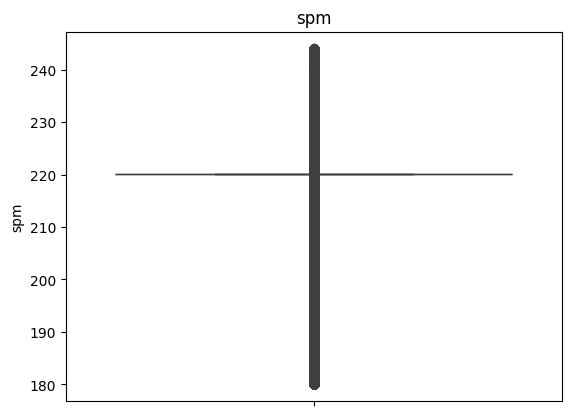

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Adjust the figure size if needed
for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()



In [20]:
from sklearn.preprocessing import LabelEncoder
col_label= ['state','location','type']
# Initialize LabelEncoder
encoder = LabelEncoder()
 # Iterate over columns
for col in col_label:
        # Fit and transform the column
        df[col] = encoder.fit_transform(df[col])
df

,state,location,type,so2,no2,rspm,spm,date
0,0,109,6,446,1489,2014,396,213
1,0,109,1,197,250,2014,396,213
2,0,109,6,790,3096,2014,396,213
3,0,109,6,823,1144,2014,396,214
4,0,109,1,427,301,2014,396,214
...,...,...,...,...,...,...,...,...
415380,33,144,6,2933,5427,4750,99,900
415381,33,144,6,2275,5427,3400,633,1022
415382,33,144,6,899,5427,4167,633,760
415383,33,144,6,862,5427,3627,633,762
